In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
import joblib
import scipy.stats as stats

In [ ]:
# Step 1: Load the Data
data = pd.read_excel("Proyecto_IA.xlsx", sheet_name='Datos Mercancia')
print(data.head())

        Pedimento PedimentoSecuencia  Patente  Pedimento.1  SeccionAduanera  \
0  65016933002866   65016933002866+1     1693      3002866              650   
1  65016933002997   65016933002997+1     1693      3002997              650   
2  47038373003315   47038373003315+3     3837      3003315              470   
3  48037113052909   48037113052909+2     3711      3052909              480   
4  65016933002469   65016933002469+1     1693      3002469              650   

   Fraccion  SecuenciaFraccion  \
0  85365099                  1   
1  85365099                  1   
2  84715001                  3   
3  85075001                  2   
4  84186999                  1   

                                DescripcionMercancia  PrecioUnitario  \
0                               INTERRUPTOR DE PEDAL         12383.0   
1                                        INTERRUPTOR           323.0   
2  UNIDAD DE PROCESAMIENTO DE DATOS PARA EQUIPO M...         21487.0   
3                               

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Step 2: Exploratory Data Analysis (EDA)
# Basic Information about the Data
data.shape
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4676 entries, 0 to 4675
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Pedimento                 4676 non-null   int64         
 1   PedimentoSecuencia        4676 non-null   object        
 2   Patente                   4676 non-null   int64         
 3   Pedimento.1               4676 non-null   int64         
 4   SeccionAduanera           4676 non-null   int64         
 5   Fraccion                  4676 non-null   int64         
 6   SecuenciaFraccion         4676 non-null   int64         
 7   DescripcionMercancia      4676 non-null   object        
 8   PrecioUnitario            4676 non-null   float64       
 9   ValorAduana               4676 non-null   int64         
 10  ValorComercial            4676 non-null   int64         
 11  ValorDolares              4676 non-null   float64       
 12  CantidadUMComercial 

In [ ]:
# Change Data Types to String for Specific Columns
data['Pedimento'] = data['Pedimento'].astype(str)
data['Patente'] = data['Patente'].astype(str)
data['Pedimento.1'] = data['Pedimento.1'].astype(str)
data['SeccionAduanera'] = data['SeccionAduanera'].astype(str)
data['Fraccion'] = data['Fraccion'].astype(str)
data['UnidadMedidaComercial'] = data['UnidadMedidaComercial'].astype(str)
data['UnidadMedidaTarifa'] = data['UnidadMedidaTarifa'].astype(str)

In [ ]:
# Remove Specific Columns
data = data.drop(columns=['SecuenciaFraccion', 'ClaveVinculacion', 'MetodoValorizacion', 'PedimentoSecuencia'])

In [ ]:
# Exploratory Data Analysis (EDA)
# Basic Information about the Data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4676 entries, 0 to 4675
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Pedimento                 4676 non-null   object        
 1   Patente                   4676 non-null   object        
 2   Pedimento.1               4676 non-null   object        
 3   SeccionAduanera           4676 non-null   object        
 4   Fraccion                  4676 non-null   object        
 5   DescripcionMercancia      4676 non-null   object        
 6   PrecioUnitario            4676 non-null   float64       
 7   ValorAduana               4676 non-null   int64         
 8   ValorComercial            4676 non-null   int64         
 9   ValorDolares              4676 non-null   float64       
 10  CantidadUMComercial       4676 non-null   float64       
 11  ImpuestosPagados          4676 non-null   int64         
 12  UnidadMedidaComercia

In [ ]:
# Check for Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values per Column:\n", missing_values)


Missing Values per Column:
 Pedimento                      0
Patente                        0
Pedimento.1                    0
SeccionAduanera                0
Fraccion                       0
DescripcionMercancia           0
PrecioUnitario                 0
ValorAduana                    0
ValorComercial                 0
ValorDolares                   0
CantidadUMComercial            0
ImpuestosPagados               0
UnidadMedidaComercial          0
CantidadUMTarifa               0
UnidadMedidaTarifa             0
PaisOrigenDestino              0
PaisCompradorVendedor          0
NOM                         3404
TipoOperacion                  0
ClaveDocumento                 0
FechaPagoReal                  0
Semaforo                       0
GradoIncidencia             4304
HoraInicioReconocimiento    4304
FechaFinReconocimiento      4304
Duracion                    4304
dtype: int64


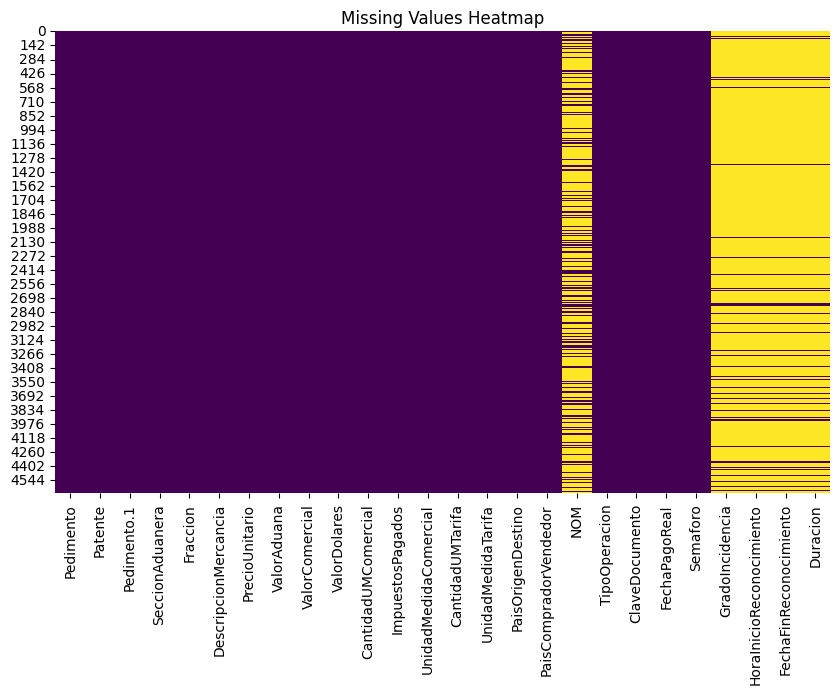

In [ ]:
# Visualize Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

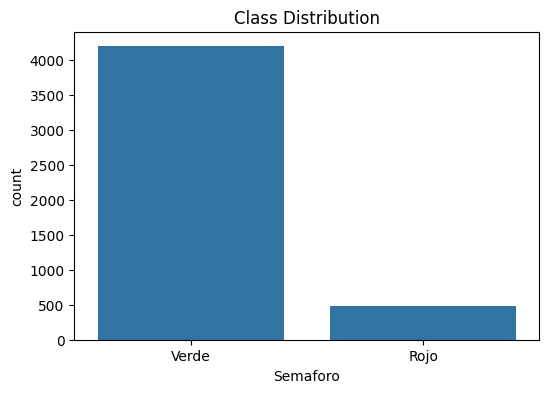

In [ ]:
# Visualize Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Semaforo', data=data)  # Replace 'target' with your actual target column name
plt.title('Class Distribution')
plt.show()

KeyboardInterrupt: 

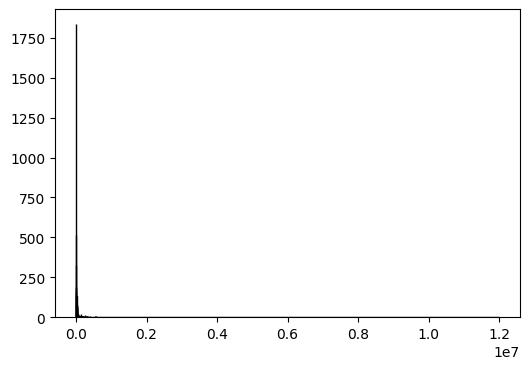

In [ ]:
# Visualize Numeric Feature Distributions
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

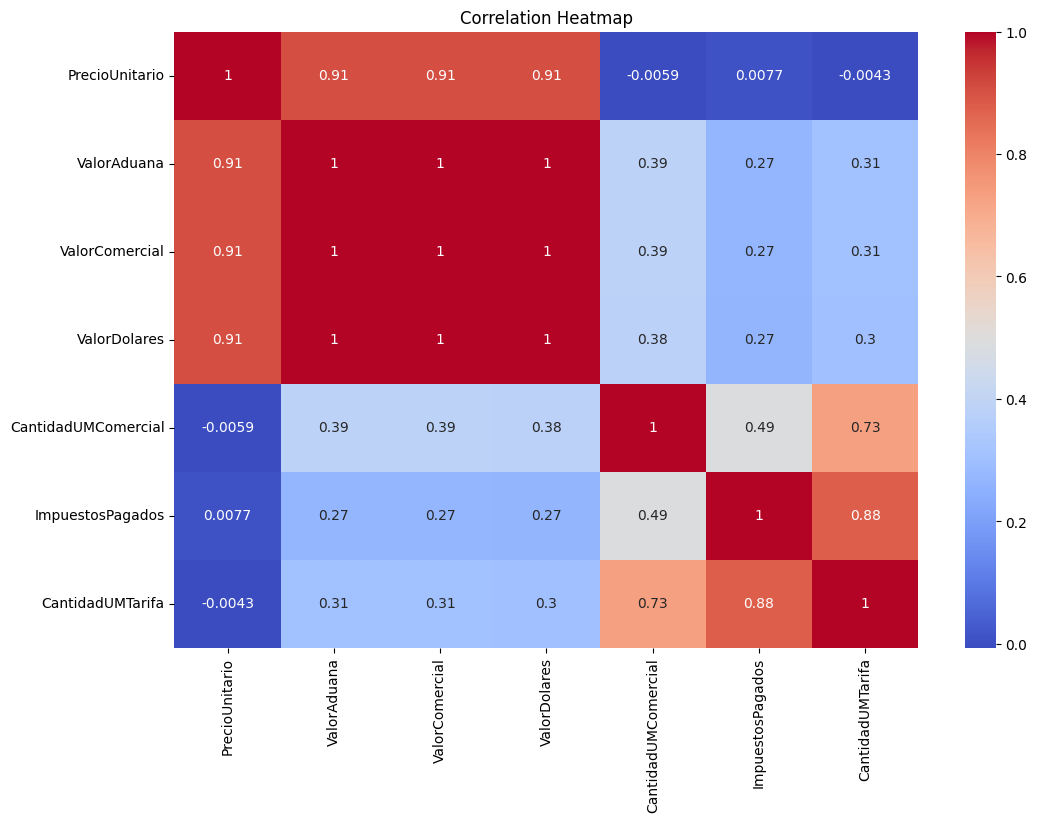

In [ ]:
# Correlation Heatmap for Numeric Features
plt.figure(figsize=(12, 8))
corr_matrix = data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Correlation for Categorical Variables using Cramer's V
categorical_features = data.select_dtypes(include=['object']).columns
for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 != col2:
            confusion_mat = pd.crosstab(data[col1], data[col2])
            chi2_stat, p, dof, ex = stats.chi2_contingency(confusion_mat)
            n = confusion_mat.sum().sum()
            cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
            print(f"Cramer's V between {col1} and {col2}: {cramer_v:.2f}")

Cramer's V between Pedimento and Patente: 1.00
Cramer's V between Pedimento and Pedimento.1: 1.00
Cramer's V between Pedimento and SeccionAduanera: 1.00
Cramer's V between Pedimento and Fraccion: 0.74
Cramer's V between Pedimento and DescripcionMercancia: 0.73
Cramer's V between Pedimento and UnidadMedidaComercial: 0.88
Cramer's V between Pedimento and UnidadMedidaTarifa: 0.84
Cramer's V between Pedimento and PaisOrigenDestino: 0.84
Cramer's V between Pedimento and PaisCompradorVendedor: 0.96
Cramer's V between Pedimento and NOM: 0.80
Cramer's V between Pedimento and TipoOperacion: 1.00
Cramer's V between Pedimento and ClaveDocumento: 1.00
Cramer's V between Pedimento and Semaforo: 1.00
Cramer's V between Pedimento and GradoIncidencia: 1.00
Cramer's V between Pedimento and HoraInicioReconocimiento: 1.00
Cramer's V between Pedimento and FechaFinReconocimiento: 1.00
Cramer's V between Pedimento and Duracion: 1.00
Cramer's V between Patente and Pedimento: 1.00
Cramer's V between Patente a

<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))


Cramer's V between TipoOperacion and Patente: 0.74
Cramer's V between TipoOperacion and Pedimento.1: 1.00
Cramer's V between TipoOperacion and SeccionAduanera: 0.74
Cramer's V between TipoOperacion and Fraccion: 0.43
Cramer's V between TipoOperacion and DescripcionMercancia: 0.81
Cramer's V between TipoOperacion and UnidadMedidaComercial: 0.57
Cramer's V between TipoOperacion and UnidadMedidaTarifa: 0.14
Cramer's V between TipoOperacion and PaisOrigenDestino: 0.55
Cramer's V between TipoOperacion and PaisCompradorVendedor: 0.15
Cramer's V between TipoOperacion and NOM: nan
Cramer's V between TipoOperacion and ClaveDocumento: 0.20
Cramer's V between TipoOperacion and Semaforo: 0.07
Cramer's V between TipoOperacion and GradoIncidencia: 0.02


<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))


Cramer's V between TipoOperacion and HoraInicioReconocimiento: 1.00
Cramer's V between TipoOperacion and FechaFinReconocimiento: 1.00
Cramer's V between TipoOperacion and Duracion: 0.94
Cramer's V between ClaveDocumento and Pedimento: 1.00
Cramer's V between ClaveDocumento and Patente: 0.28
Cramer's V between ClaveDocumento and Pedimento.1: 1.00
Cramer's V between ClaveDocumento and SeccionAduanera: 0.13
Cramer's V between ClaveDocumento and Fraccion: 0.62
Cramer's V between ClaveDocumento and DescripcionMercancia: 0.77
Cramer's V between ClaveDocumento and UnidadMedidaComercial: 0.03
Cramer's V between ClaveDocumento and UnidadMedidaTarifa: 0.08
Cramer's V between ClaveDocumento and PaisOrigenDestino: 0.25
Cramer's V between ClaveDocumento and PaisCompradorVendedor: 0.14
Cramer's V between ClaveDocumento and NOM: nan
Cramer's V between ClaveDocumento and TipoOperacion: 0.20
Cramer's V between ClaveDocumento and Semaforo: 0.03
Cramer's V between ClaveDocumento and GradoIncidencia: nan


<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))


Cramer's V between Semaforo and Pedimento.1: 0.97
Cramer's V between Semaforo and SeccionAduanera: 0.14
Cramer's V between Semaforo and Fraccion: 0.27
Cramer's V between Semaforo and DescripcionMercancia: 0.59
Cramer's V between Semaforo and UnidadMedidaComercial: 0.08
Cramer's V between Semaforo and UnidadMedidaTarifa: 0.01
Cramer's V between Semaforo and PaisOrigenDestino: 0.18
Cramer's V between Semaforo and PaisCompradorVendedor: 0.11
Cramer's V between Semaforo and NOM: 0.19
Cramer's V between Semaforo and TipoOperacion: 0.07
Cramer's V between Semaforo and ClaveDocumento: 0.03
Cramer's V between Semaforo and GradoIncidencia: nan
Cramer's V between Semaforo and HoraInicioReconocimiento: nan
Cramer's V between Semaforo and FechaFinReconocimiento: nan
Cramer's V between Semaforo and Duracion: nan


<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))


Cramer's V between GradoIncidencia and Pedimento: 1.00
Cramer's V between GradoIncidencia and Patente: 1.00
Cramer's V between GradoIncidencia and Pedimento.1: 1.00
Cramer's V between GradoIncidencia and SeccionAduanera: 0.20
Cramer's V between GradoIncidencia and Fraccion: 1.00
Cramer's V between GradoIncidencia and DescripcionMercancia: 1.00
Cramer's V between GradoIncidencia and UnidadMedidaComercial: 0.05
Cramer's V between GradoIncidencia and UnidadMedidaTarifa: 0.11
Cramer's V between GradoIncidencia and PaisOrigenDestino: 1.00
Cramer's V between GradoIncidencia and PaisCompradorVendedor: 1.00
Cramer's V between GradoIncidencia and NOM: nan
Cramer's V between GradoIncidencia and TipoOperacion: 0.02
Cramer's V between GradoIncidencia and ClaveDocumento: nan
Cramer's V between GradoIncidencia and Semaforo: nan
Cramer's V between GradoIncidencia and HoraInicioReconocimiento: 1.00
Cramer's V between GradoIncidencia and FechaFinReconocimiento: 0.91


<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))


Cramer's V between GradoIncidencia and Duracion: 1.00
Cramer's V between HoraInicioReconocimiento and Pedimento: 1.00
Cramer's V between HoraInicioReconocimiento and Patente: 1.00
Cramer's V between HoraInicioReconocimiento and Pedimento.1: 1.00
Cramer's V between HoraInicioReconocimiento and SeccionAduanera: 1.00
Cramer's V between HoraInicioReconocimiento and Fraccion: 0.56
Cramer's V between HoraInicioReconocimiento and DescripcionMercancia: 0.91
Cramer's V between HoraInicioReconocimiento and UnidadMedidaComercial: 0.65
Cramer's V between HoraInicioReconocimiento and UnidadMedidaTarifa: 0.34
Cramer's V between HoraInicioReconocimiento and PaisOrigenDestino: 0.48
Cramer's V between HoraInicioReconocimiento and PaisCompradorVendedor: 0.58
Cramer's V between HoraInicioReconocimiento and NOM: 0.52
Cramer's V between HoraInicioReconocimiento and TipoOperacion: 1.00
Cramer's V between HoraInicioReconocimiento and ClaveDocumento: nan
Cramer's V between HoraInicioReconocimiento and Semafor

<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))


Cramer's V between HoraInicioReconocimiento and GradoIncidencia: 1.00
Cramer's V between HoraInicioReconocimiento and FechaFinReconocimiento: 0.93
Cramer's V between HoraInicioReconocimiento and Duracion: 0.91
Cramer's V between FechaFinReconocimiento and Pedimento: 1.00
Cramer's V between FechaFinReconocimiento and Patente: 0.91
Cramer's V between FechaFinReconocimiento and Pedimento.1: 1.00
Cramer's V between FechaFinReconocimiento and SeccionAduanera: 0.88
Cramer's V between FechaFinReconocimiento and Fraccion: 0.56
Cramer's V between FechaFinReconocimiento and DescripcionMercancia: 0.78
Cramer's V between FechaFinReconocimiento and UnidadMedidaComercial: 0.76
Cramer's V between FechaFinReconocimiento and UnidadMedidaTarifa: 0.68
Cramer's V between FechaFinReconocimiento and PaisOrigenDestino: 0.59
Cramer's V between FechaFinReconocimiento and PaisCompradorVendedor: 0.63
Cramer's V between FechaFinReconocimiento and NOM: 0.76
Cramer's V between FechaFinReconocimiento and TipoOperaci

<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))


Cramer's V between Duracion and PaisOrigenDestino: 0.60
Cramer's V between Duracion and PaisCompradorVendedor: 0.61
Cramer's V between Duracion and NOM: 0.74
Cramer's V between Duracion and TipoOperacion: 0.94
Cramer's V between Duracion and ClaveDocumento: nan
Cramer's V between Duracion and Semaforo: nan
Cramer's V between Duracion and GradoIncidencia: 1.00
Cramer's V between Duracion and HoraInicioReconocimiento: 0.91
Cramer's V between Duracion and FechaFinReconocimiento: 0.94


<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-99-a2ffd106b44a>:9: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))


In [ ]:
# Correlation for Categorical Variables using Cramer's V
categorical_features = data.select_dtypes(include=['object']).columns
cramers_v_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)
for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 != col2:
            confusion_mat = pd.crosstab(data[col1], data[col2])
            chi2_stat, p, dof, ex = stats.chi2_contingency(confusion_mat)
            n = confusion_mat.sum().sum()
            cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
            cramers_v_matrix.loc[col1, col2] = cramer_v
        else:
            cramers_v_matrix.loc[col1, col2] = 1.0

# Convert values to numeric
cramers_v_matrix = cramers_v_matrix.apply(pd.to_numeric)

<ipython-input-100-2d0967753f3d>:10: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-100-2d0967753f3d>:10: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-100-2d0967753f3d>:10: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-100-2d0967753f3d>:10: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-100-2d0967753f3d>:10: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-100-2d0967753f3d>:10: RuntimeWarning: invalid value encountered in divide
  cramer_v = np.sqrt(chi2_stat / (n * (min(confusion_mat.shape) - 1)))
<ipython-input-100-2d0967753f3d>:10: Run

In [ ]:
# Convert values to numeric
cramers_v_matrix = cramers_v_matrix.apply(pd.to_numeric)

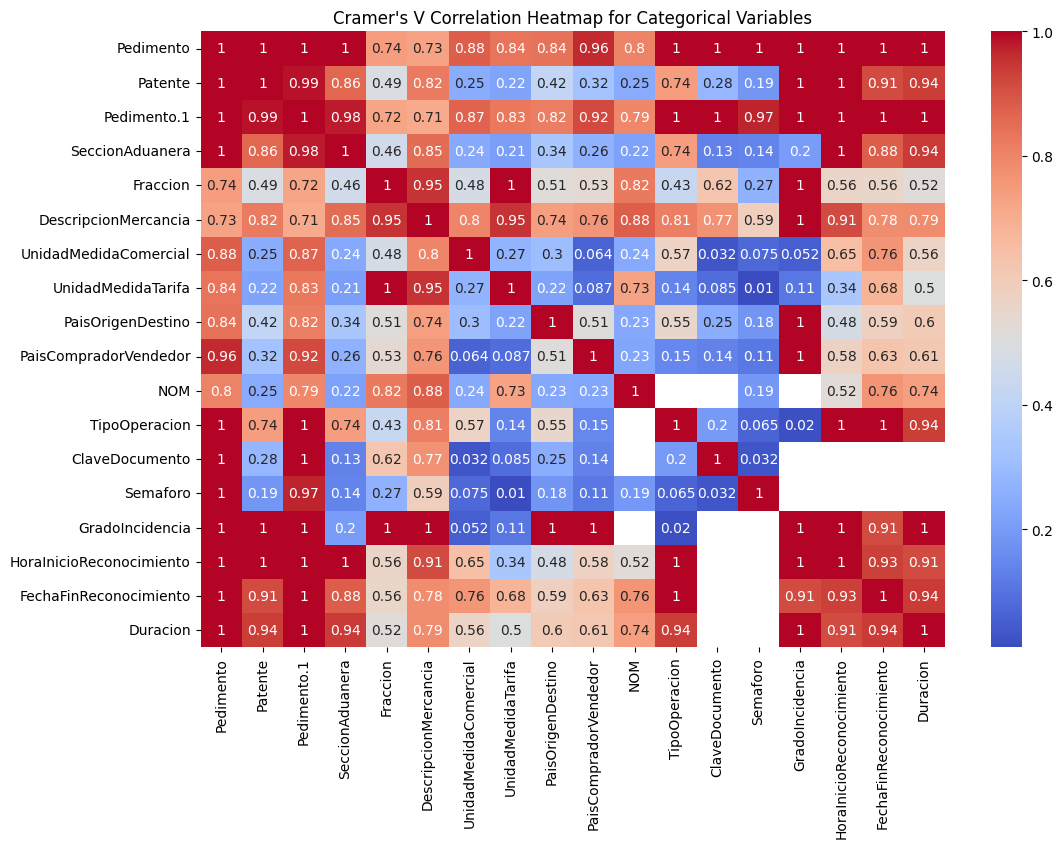

In [ ]:
# Plot Cramer's V Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm')
plt.title("Cramer's V Correlation Heatmap for Categorical Variables")
plt.show()

In [ ]:
# Drop Highly Correlated Numeric Features
threshold = 0.9
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_numeric = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
data = data.drop(columns=to_drop_numeric)

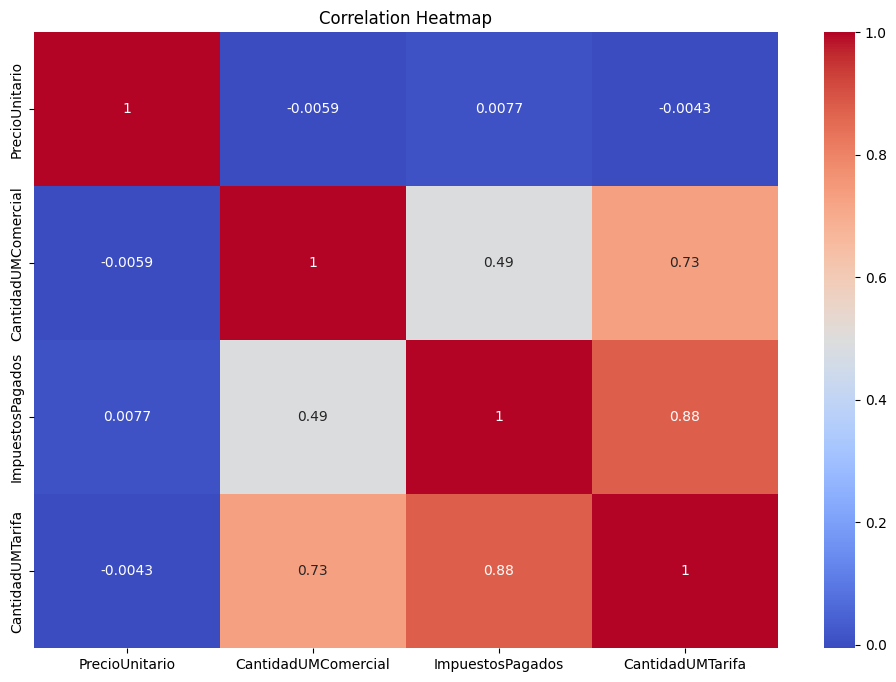

In [ ]:
# Correlation Heatmap for Numeric Features
plt.figure(figsize=(12, 8))
corr_matrix = data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
data.columns

Index(['Pedimento', 'Patente', 'Pedimento.1', 'SeccionAduanera', 'Fraccion',
       'DescripcionMercancia', 'PrecioUnitario', 'ValorAduana',
       'ValorComercial', 'ValorDolares', 'CantidadUMComercial',
       'ImpuestosPagados', 'UnidadMedidaComercial', 'CantidadUMTarifa',
       'UnidadMedidaTarifa', 'PaisOrigenDestino', 'PaisCompradorVendedor',
       'NOM', 'TipoOperacion', 'ClaveDocumento', 'FechaPagoReal', 'Semaforo',
       'GradoIncidencia', 'HoraInicioReconocimiento', 'FechaFinReconocimiento',
       'Duracion'],
      dtype='object')

In [ ]:
# Step 3: Chi-Squared Test for Categorical Variables to Determine Significance
categorical_features = data.select_dtypes(include=['object']).columns
significant_categorical_features = []
target = 'Semaforo'  # Replace 'target' with your actual target column name

NameError: name 'data' is not defined

In [ ]:
data.columns

Index(['Pedimento', 'Patente', 'Pedimento.1', 'SeccionAduanera', 'Fraccion',
       'DescripcionMercancia', 'PrecioUnitario', 'ValorAduana',
       'ValorComercial', 'ValorDolares', 'CantidadUMComercial',
       'ImpuestosPagados', 'UnidadMedidaComercial', 'CantidadUMTarifa',
       'UnidadMedidaTarifa', 'PaisOrigenDestino', 'PaisCompradorVendedor',
       'NOM', 'TipoOperacion', 'ClaveDocumento', 'FechaPagoReal', 'Semaforo',
       'GradoIncidencia', 'HoraInicioReconocimiento', 'FechaFinReconocimiento',
       'Duracion'],
      dtype='object')

In [ ]:
data_cat = data[['DescripcionMercancia', 'Patente', 'SeccionAduanera', 'Fraccion', 'PaisOrigenDestino', 'NOM', 'TipoOperacion', 'Semaforo']]
data_cat.head(2)

,DescripcionMercancia,Patente,SeccionAduanera,Fraccion,PaisOrigenDestino,NOM,TipoOperacion,Semaforo
0,INTERRUPTOR DE PEDAL,1693,650,85365099,DEU,NOM-024-SCFI-2013,Importacion,Verde
1,INTERRUPTOR,1693,650,85365099,USA,NOM-003-SCFI-2014,Importacion,Verde


<ipython-input-27-b47294458b52>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
<ipython-input-27-b47294458b52>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
<ipython-input-27-b47294458b52>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
<ipython-input-27-b47294458b52>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
<ipython-input-27-b47294458b52>:11: UserWarning: set_ticklabels() should only be

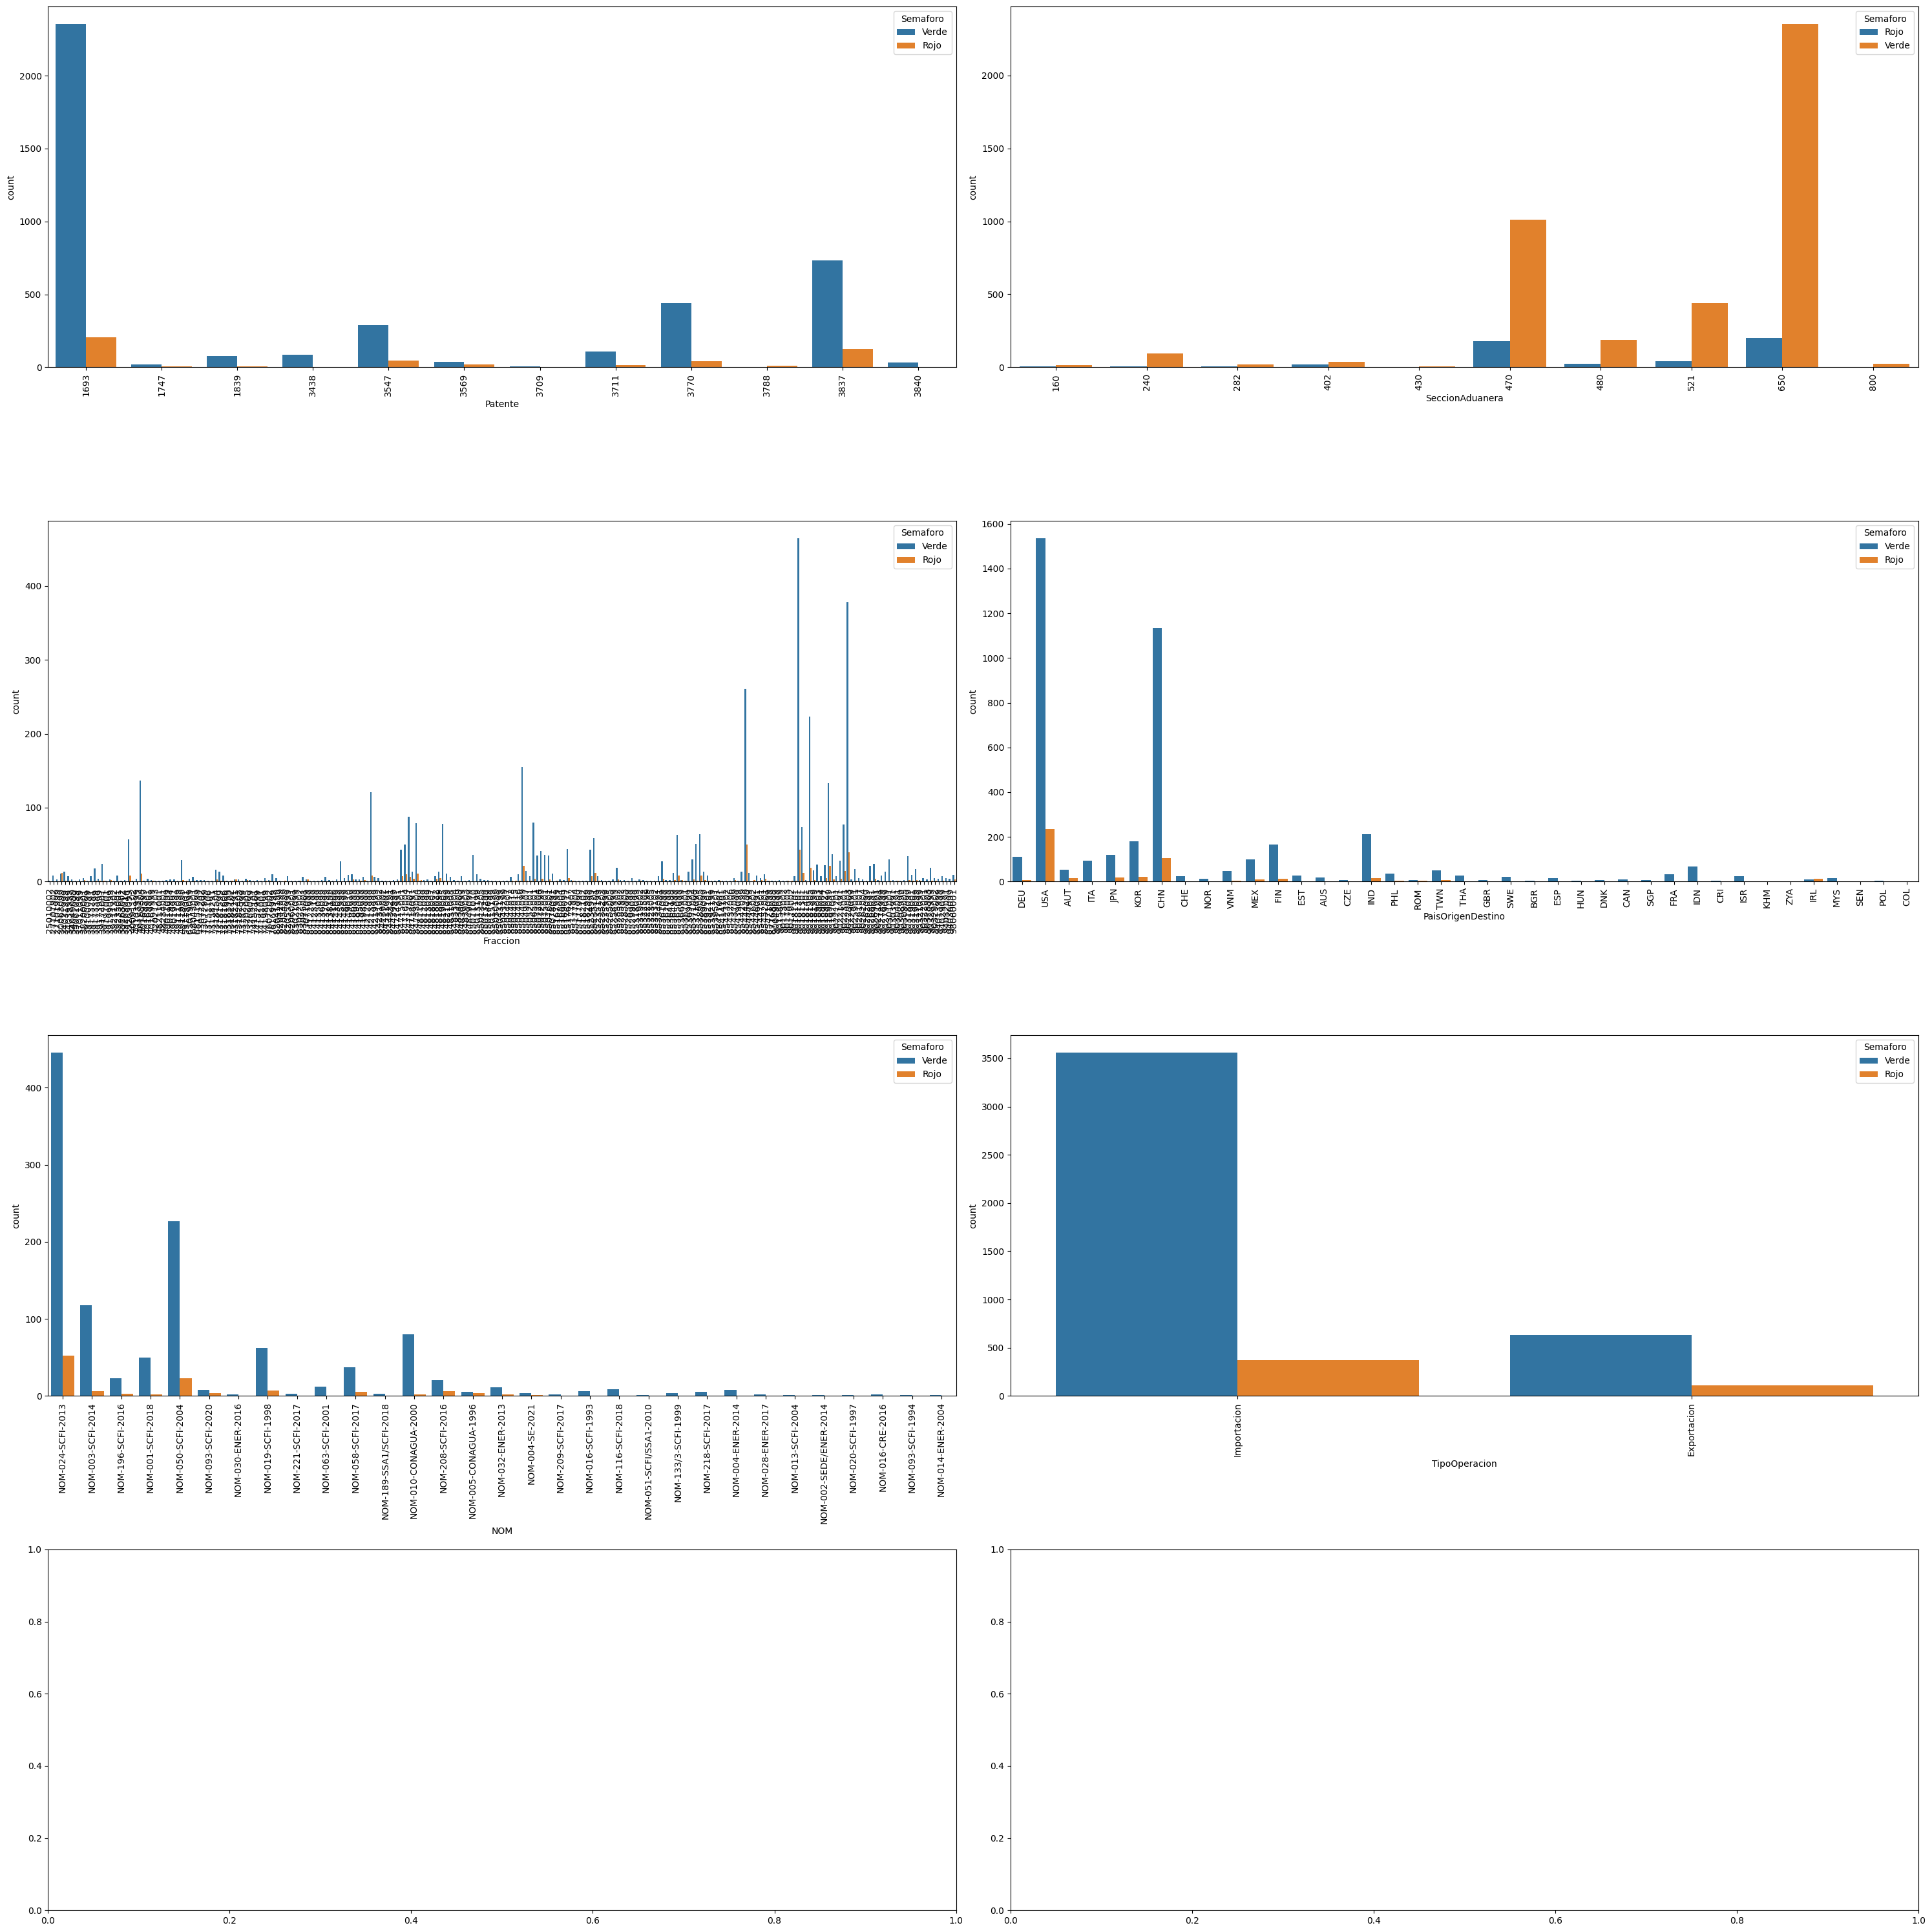

In [ ]:
# Crear figuras con subplots

cat_vars = ['Patente', 'SeccionAduanera', 'Fraccion', 'PaisOrigenDestino', 'NOM', 'TipoOperacion']

fig, axs = plt.subplots(nrows=4, ncols = 2, figsize = (30,30))
axs = axs.flatten()

#Crear un countplot para cada variable categorica
for i, var in enumerate (cat_vars):
    sns.countplot(x=var, hue = 'Semaforo', data = data_cat, ax = axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)

# Ajustar espacio entre subplots
fig.tight_layout()

# Mostrar el plot
plt.show()

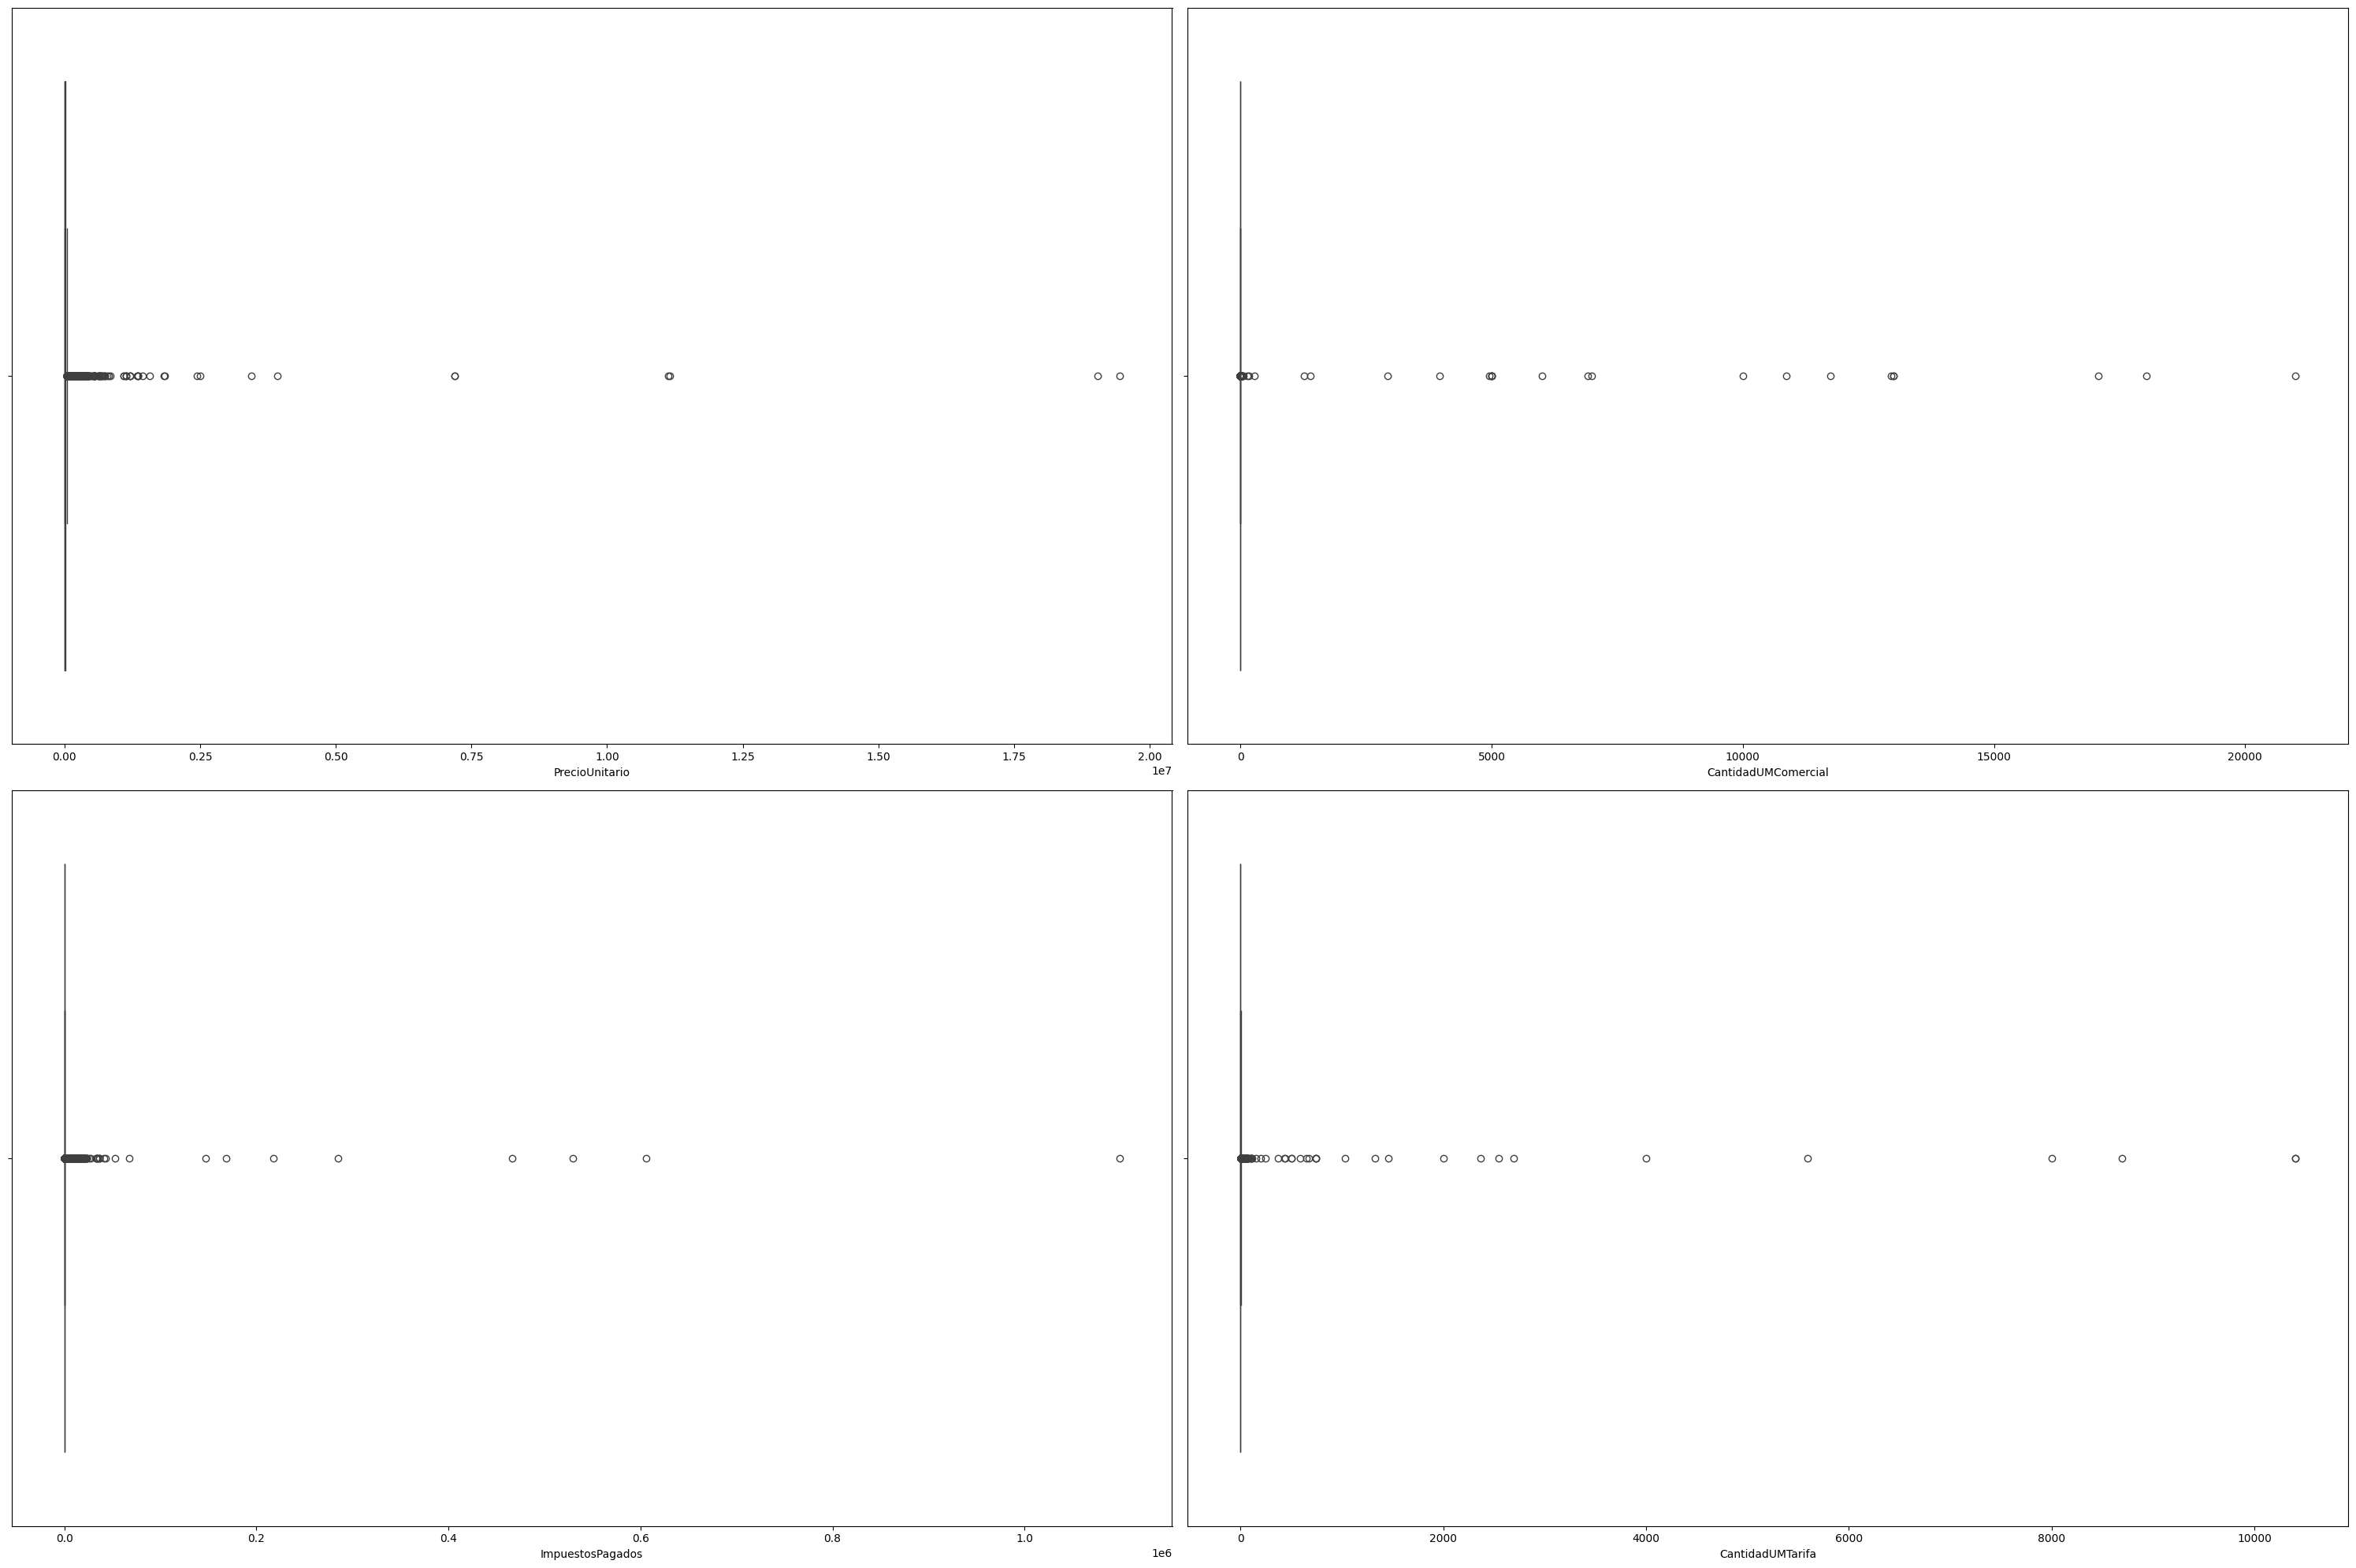

In [ ]:
# Crear figuras box plots

num_vars = ['PrecioUnitario', 'CantidadUMComercial', 'ImpuestosPagados', 'CantidadUMTarifa']

fig, axs = plt.subplots(nrows = 2, ncols=2, figsize = (30,20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=data, ax=axs[i])

fig.tight_layout()

plt.show()

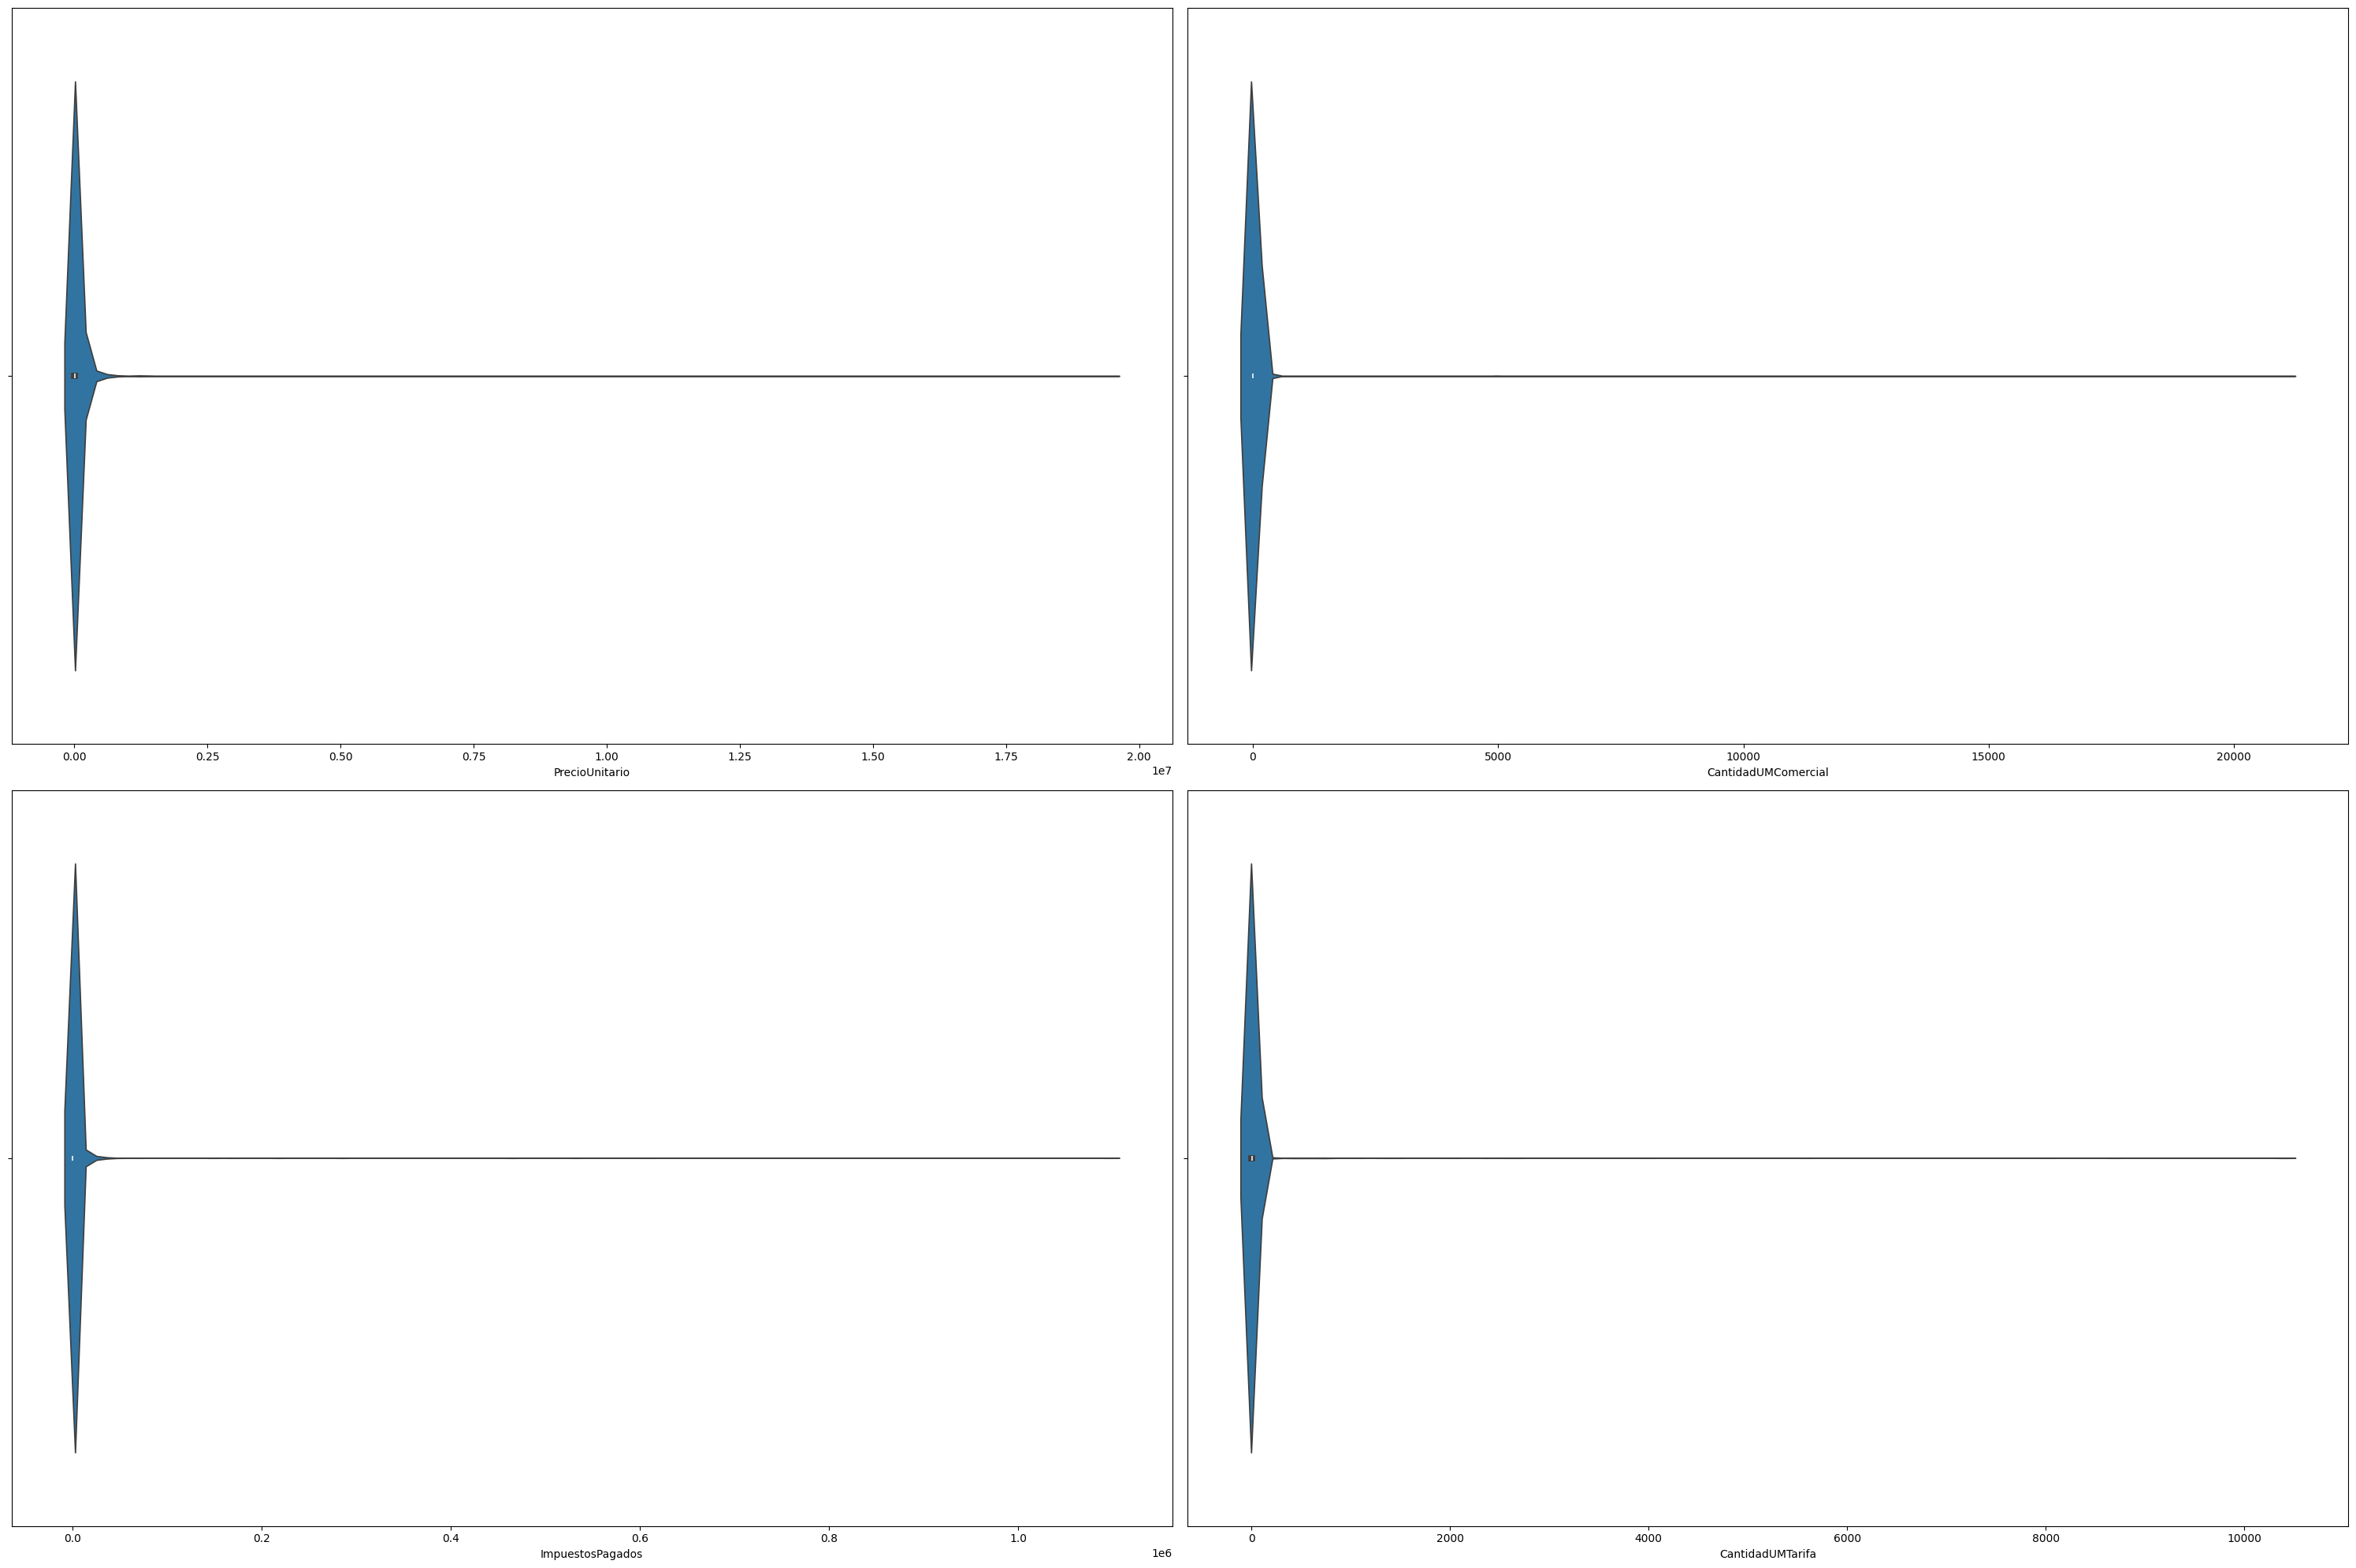

In [ ]:
# Crear figuras violin

num_vars = ['PrecioUnitario', 'CantidadUMComercial', 'ImpuestosPagados', 'CantidadUMTarifa']

fig, axs = plt.subplots(nrows = 2, ncols=2, figsize = (30,20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=data, ax=axs[i])

fig.tight_layout()

plt.show()

Procesamiento de datos


In [ ]:
data['Semaforo'].unique()

array(['Verde', 'Rojo'], dtype=object)

In [ ]:
data['DescripcionMercancia'].unique()

array(['INTERRUPTOR DE PEDAL', 'INTERRUPTOR',
       'UNIDAD DE PROCESAMIENTO DE DATOS PARA EQUIPO MEDICO', ...,
       'DISPLAY PARA SISTEMA DE MONITOREO DE PACIENTES',
       'CIRCUITO MODULAR PARA APARATOS DE ANESTESIA',
       'AMPLIFICADOR DE RADIOFRECUENCIA'], dtype=object)

In [ ]:
data['Patente'].unique()

array([1693, 3837, 3711, 3770, 3547, 1839, 1747, 3438, 3840, 3569, 3709,
       3788])

In [ ]:
data['SeccionAduanera'].unique()


array([650, 470, 480, 521, 160, 282, 240, 800, 402, 430])

In [ ]:
data['Fraccion'].unique()


array(['85365099', '84715001', '85075001', '84186999', '90229003',
       '85011010', '85044099', '84733004', '85444299', '90223001'],
      dtype=object)

In [ ]:
data['PaisOrigenDestino'].unique()

array(['DEU', 'USA', 'AUT', 'ITA', 'JPN', 'KOR', 'CHN', 'CHE', 'NOR',
       'VNM', 'MEX', 'FIN', 'EST', 'AUS', 'CZE', 'IND', 'PHL', 'ROM',
       'TWN', 'THA', 'GBR', 'SWE', 'BGR', 'ESP', 'HUN', 'DNK', 'CAN',
       'SGP', 'FRA', 'IDN', 'CRI', 'ISR', 'KHM', 'ZYA', 'IRL', 'MYS',
       'SEN', 'POL', 'COL'], dtype=object)

In [ ]:
data['NOM'].unique()

array(['NOM-024-SCFI-2013', 'NOM-003-SCFI-2014', 'NOM-196-SCFI-2016', nan,
       'NOM-001-SCFI-2018', 'NOM-050-SCFI-2004', 'NOM-093-SCFI-2020',
       'NOM-030-ENER-2016', 'NOM-019-SCFI-1998', 'NOM-221-SCFI-2017',
       'NOM-063-SCFI-2001', 'NOM-058-SCFI-2017', 'NOM-189-SSA1/SCFI-2018',
       'NOM-010-CONAGUA-2000', 'NOM-208-SCFI-2016',
       'NOM-005-CONAGUA-1996', 'NOM-032-ENER-2013', 'NOM-004-SE-2021',
       'NOM-209-SCFI-2017', 'NOM-016-SCFI-1993', 'NOM-116-SCFI-2018',
       'NOM-051-SCFI/SSA1-2010', 'NOM-133/3-SCFI-1999',
       'NOM-218-SCFI-2017', 'NOM-004-ENER-2014', 'NOM-028-ENER-2017',
       'NOM-013-SCFI-2004', 'NOM-002-SEDE/ENER-2014', 'NOM-020-SCFI-1997',
       'NOM-016-CRE-2016', 'NOM-093-SCFI-1994', 'NOM-014-ENER-2004'],
      dtype=object)

In [ ]:
data['TipoOperacion'].unique()

array(['Importacion', 'Exportacion'], dtype=object)

In [ ]:
data['Fraccion'].unique()

array([85365099, 84715001, 85075001, 84186999, 90229003, 85011010,
       85044099, 84733004, 85444299, 90223001, 90221491, 90189099,
       85044016, 76169999, 40169304, 90181201, 84716004, 85072099,
       39269099, 73182403, 85235101, 90181905, 84213999, 39173399,
       84818099, 90181999, 85395201, 73181504, 85072004, 85168004,
       84717001, 84833004, 85076001, 90269001, 90318099, 90181301,
       85361099, 85371004, 85176217, 90192001, 34031999, 90189003,
       90319099, 85049007, 68043001, 85285202, 85371099, 85364999,
       84231002, 85444999, 90189027, 90301001, 84145999, 34039999,
       38200001, 90259001, 37011099, 85389005, 85065001, 73181599,
       90268091, 34049099, 39174001, 85234999, 90328999, 84819005,
       73151106, 85442099, 90279099, 49019904, 84718091, 40103999,
       39235001, 85052001, 90261007, 84813099, 90262004, 85078091,
       84821099, 85389099, 84195099, 85323005, 49119999, 90303991,
       84714991, 85177904, 84818007, 84818022, 85432006, 84811

Agrupar Columna 'Fraccion'


In [ ]:
# Assuming data is your DataFrame and 'Fraccion' is the column
data_frac = pd.DataFrame({'Fraccion': [
       85365099, 84715001, 85075001, 84186999, 90229003, 85011010,
       85044099, 84733004, 85444299, 90223001, 90221491, 90189099,
       85044016, 76169999, 40169304, 90181201, 84716004, 85072099,
       39269099, 73182403, 85235101, 90181905, 84213999, 39173399,
       84818099, 90181999, 85395201, 73181504, 85072004, 85168004,
       84717001, 84833004, 85076001, 90269001, 90318099, 90181301,
       85361099, 85371004, 85176217, 90192001, 34031999, 90189003,
       90319099, 85049007, 68043001, 85285202, 85371099, 85364999,
       84231002, 85444999, 90189027, 90301001, 84145999, 34039999,
       38200001, 90259001, 37011099, 85389005, 85065001, 73181599,
       90268091, 34049099, 39174001, 85234999, 90328999, 84819005,
       73151106, 85442099, 90279099, 49019904, 84718091, 40103999,
       39235001, 85052001, 90261007, 84813099, 90262004, 85078091,
       84821099, 85389099, 84195099, 85323005, 49119999, 90303991,
       84714991, 85177904, 84818007, 84818022, 85432006, 84811099,
       85258999, 85446002, 85392101, 85369099, 73182999, 84141006,
       82055999, 73072999, 84198999, 85235199, 84148099, 90181101,
       63079099, 84831008, 39173999, 83022002, 85364199, 85411001,
       39199099, 85366999, 90319001, 90328903, 85299099, 40169901,
       73202005, 85334091, 85452001, 85362099, 82041199, 84137099,
       90221201, 90322001, 85447001, 85015199, 84122999, 85013199,
       94032091, 85013205, 73182291, 84212999, 84189999, 83071099,
       39173291, 85437099, 85471099, 84149010, 27101999, 76072002,
       85177999, 90278999, 27101902, 74198099, 90181401, 73072202,
       84812099, 90189004, 84836099, 39100099, 84219999, 87168099,
       85446091, 25010002, 85013299, 84239002, 85322502, 90229099,
       40169599, 85044013, 85169099, 73181606, 48234001, 85333102,
       90329002, 84123199, 49019991, 84439999, 94036099, 85177902,
       85423202, 83025001, 90178003, 84138199, 84849099, 90308999,
       49011099, 90049099, 84136099, 98060001, 35061099, 30063099,
       85285903, 48211001, 94013999, 74152999, 82042099, 39269014,
       49111099, 85319002, 85235999, 94029099, 85235203, 84433291,
       85439099, 85030099, 73158291, 85285902, 84143099, 85255005,
       73269099, 90309005, 84311001, 85167999, 90262099, 90271001,
       90321099, 40169999, 39191001, 85044015, 85014099, 59119001,
       39211302, 85043299, 85414101, 85318099, 85182999, 90304091,
       74152101, 83021099, 85285999, 73181999, 40091102, 73182102,
       90158099, 85392199, 85367001, 42021203, 90179002, 84834009,
       85043199, 68151999, 82060001, 90173002, 85044007, 84839003,
       84135099, 85322599, 85182102, 74181001, 82054099, 39263002

     ]})

In [ ]:
# Define the mapping dictionary based on the first two digits
replacement_dict = {
    # Replace based on prefix
    **{code: 'Group 80-89' for code in data_frac['Fraccion'] if str(code).startswith(('80', '81', '82', '83', '84', '85', '86', '87', '88', '89'))},
    **{code: 'Group 90-99' for code in data_frac['Fraccion'] if str(code).startswith(('90', '91', '92', '93', '94', '95', '96', '97', '98', '99'))},
    **{code: 'Group 70-79' for code in data_frac['Fraccion'] if str(code).startswith(('70', '71', '72', '73', '74', '75', '76', '77', '78', '79'))},
    **{code: 'Group 30-49' for code in data_frac['Fraccion'] if str(code).startswith(('30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49'))},
    **{code: 'Group 60-69' for code in data_frac['Fraccion'] if str(code).startswith(('60', '61', '62', '63', '64', '65', '66', '67', '68', '69'))},
    **{code: 'Group 00-29' for code in data_frac['Fraccion'] if str(code).startswith(('00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29'))},
    **{code: 'Group 50-59' for code in data_frac['Fraccion'] if str(code).startswith(('50', '51', '52', '53', '54', '55', '56', '57', '58', '59'))},
}

In [ ]:
# Apply the replacement
data['Fraccion'].replace(replacement_dict, inplace=True)

<ipython-input-37-cdf0191e9dba>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Fraccion'].replace(replacement_dict, inplace=True)


In [ ]:
data['Fraccion'].unique()

array(['Group 80-89', 'Group 90-99', 'Group 70-79', 'Group 30-49',
       'Group 60-69', 'Group 00-29', 'Group 50-59'], dtype=object)

Eliminar columnas

In [ ]:
data.drop(columns=['Pedimento', 'Pedimento.1', 'ValorAduana', 'ValorComercial', 'ValorDolares', 'UnidadMedidaComercial', 'UnidadMedidaTarifa', 'PaisCompradorVendedor', 'ClaveDocumento', 'FechaPagoReal', 'GradoIncidencia', 'HoraInicioReconocimiento', 'FechaFinReconocimiento', 'Duracion']
, inplace=True)


KeyError: "['Pedimento', 'Pedimento.1', 'ValorAduana', 'ValorComercial', 'ValorDolares', 'UnidadMedidaComercial', 'UnidadMedidaTarifa', 'PaisCompradorVendedor', 'ClaveDocumento', 'FechaPagoReal', 'GradoIncidencia', 'HoraInicioReconocimiento', 'FechaFinReconocimiento', 'Duracion'] not found in axis"

In [ ]:
data.drop(columns=['PedimentoSecuencia'], inplace=True)

In [ ]:
data.drop(columns=['DescripcionMercancia'], inplace=True)

##Procesar datos de las variables categóricas

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Semaforo']= label_encoder.fit_transform(data['Semaforo'])
data['Semaforo'].unique()

array([1, 0])

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Patente']= label_encoder.fit_transform(data['Patente'])
data['Patente'].unique()

array([ 0, 10,  7,  8,  4,  2,  1,  3, 11,  5,  6,  9])

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['SeccionAduanera']= label_encoder.fit_transform(data['SeccionAduanera'])
data['SeccionAduanera'].unique()

array([8, 5, 6, 7, 0, 2, 1, 9, 3, 4])

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Fraccion']= label_encoder.fit_transform(data['Fraccion'])
data['Fraccion'].unique()

array([5, 6, 4, 1, 3, 0, 2])

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['PaisOrigenDestino']= label_encoder.fit_transform(data['PaisOrigenDestino'])
data['PaisOrigenDestino'].unique()

array([ 9, 36,  1, 21, 22, 24,  5,  4, 27, 37, 25, 13, 12,  0,  8, 18, 28,
       30, 35, 34, 15, 33,  2, 11, 16, 10,  3, 32, 14, 17,  7, 20, 23, 38,
       19, 26, 31, 29,  6])

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['NOM']= label_encoder.fit_transform(data['NOM'])
data['NOM'].unique()

array([13,  2, 26, 31,  0, 17, 22, 15, 11, 30, 20, 19, 25,  6, 27,  5, 16,
        4, 28, 10, 23, 18, 24, 29,  3, 14,  7,  1, 12,  9, 21,  8])

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['TipoOperacion']= label_encoder.fit_transform(data['TipoOperacion'])
data['TipoOperacion'].unique()

array([1, 0])

In [ ]:
#data_cat = data[['DescripcionMercancia', 'Patente', 'SeccionAduanera', 'Fraccion', 'PaisOrigenDestino', 'NOM', 'TipoOperacion', 'Semaforo']]

,count
Semaforo,
1,4194
0,482


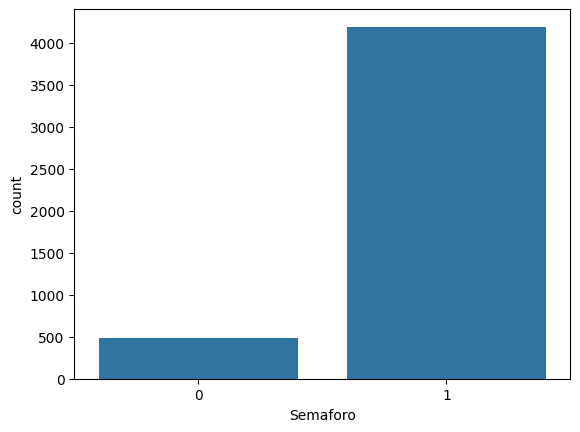

In [ ]:
sns.countplot(x='Semaforo', data= data)
data['Semaforo'].value_counts()

## Balancear las variables

In [ ]:
from sklearn.utils import resample
#Crear dos diferentes dataframe de una clase mayoritaria y minoritaria
df_majority = data[(data['Semaforo']==1)]
df_minority = data[(data['Semaforo']==0)]

# muestreo ascendente de la clase minoritaria
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # muesta con reemplazo
                                 n_samples= 4194, # para que coincida con la clase mayoritaria
                                 random_state=0)   # resultados reproducible

# Combinar la clase mayoritaria con la muestra ascendente de la clase minoritaria
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

,count
Semaforo,
0,4194
1,4194


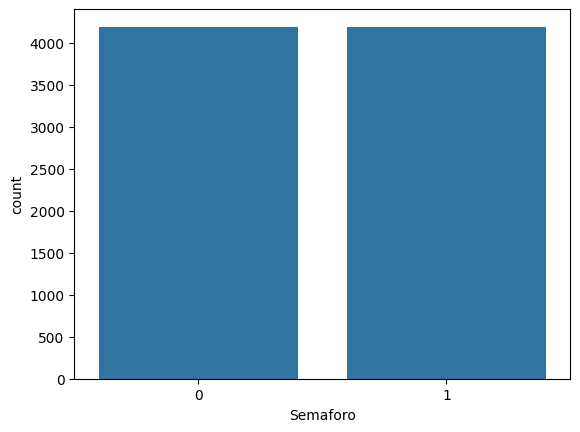

In [ ]:
sns.countplot(x= 'Semaforo', data = df_upsampled)
df_upsampled['Semaforo'].value_counts()

## Eliminar Outliers

In [ ]:
def remove_outliers_iqr(df3, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df2 = df3[(df3[col] >= lower_bound) & (df3[col] <= upper_bound)]
    return df3

# Señale las columnas para remover los outliers
columns_to_check = ['PrecioUnitario', 'CantidadUMComercial', 'ImpuestosPagados', 'CantidadUMTarifa']

# Solicitar la función que remueve los outliers usando IQR
data_clean = remove_outliers_iqr(df_upsampled, columns_to_check)

# Mostrar el resultado en el dataframe
data_clean.head()

,Patente,SeccionAduanera,Fraccion,SecuenciaFraccion,PrecioUnitario,CantidadUMComercial,ImpuestosPagados,CantidadUMTarifa,ClaveVinculacion,MetodoValorizacion,PaisOrigenDestino,NOM,TipoOperacion,Semaforo
2394,10,5,5,3,1219.0,1.0,0,1.000,0,0,36,31,0,0
486,4,5,6,1,29576.0,1.0,0,1.500,1,1,5,31,1,0
1732,10,5,5,47,7384.0,1.0,0,1.000,0,0,36,31,0,0
2599,10,5,6,1,676954.0,1.0,34818,1.000,1,1,24,31,1,0
3492,0,8,6,1,12644.0,1.0,0,0.476,1,1,5,31,1,0


In [ ]:
data_clean.shape

(8388, 14)

No. de Registros

## Regresión Logística

Definir vector de catacterísticas (X) y variable target (y)

In [ ]:
X = data_clean.drop('Semaforo', axis=1)
y = data_clean['Semaforo']

Dividir arrays o matrices en subconjuntos aleatorios de entrenamiento y pruebas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

Imputar el modelo

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

## Métricas de desempeño

In [ ]:
y_pred = LR.predict(X_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(LR.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(LR.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.56
Precisión en el set de Test: 0.57


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))

F-1 Score :  0.5657528804131903
Precision Score :  0.5657528804131903
Recall Score :  0.5657528804131903


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.45      0.50      1246
           1       0.56      0.68      0.61      1271

    accuracy                           0.57      2517
   macro avg       0.57      0.56      0.56      2517
weighted avg       0.57      0.57      0.56      2517



Matriz de confusión

<Figure size 900x900 with 0 Axes>

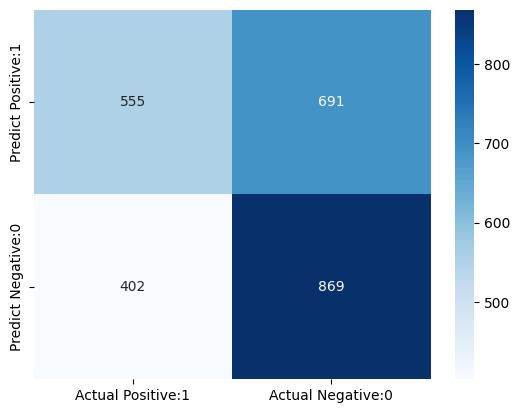

<Figure size 900x900 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

In [ ]:
y_pred_prob = LR.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

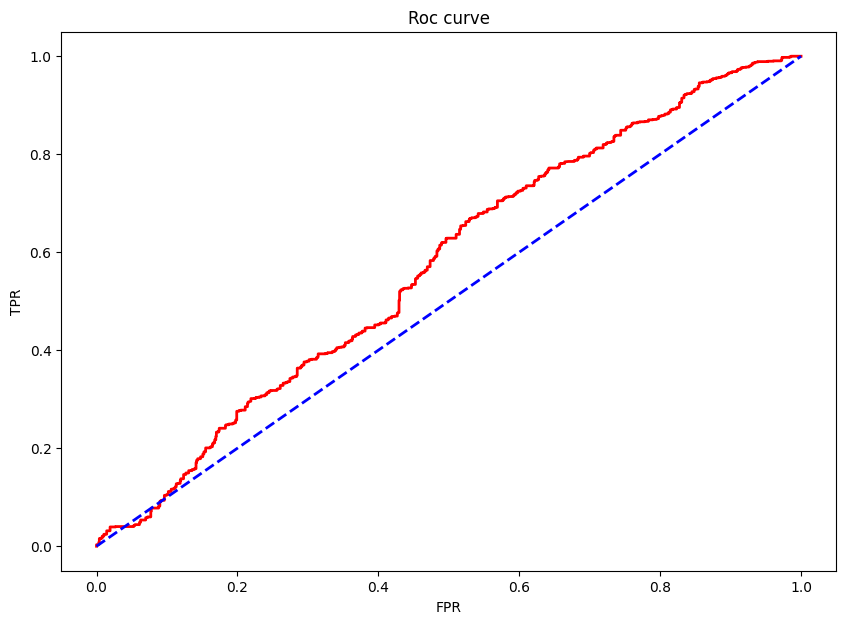

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

Selección de las mejores 6 variables para el modelo

In [ ]:
from sklearn.feature_selection import SelectKBest
best=SelectKBest(k=6)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Patente', 'SeccionAduanera', 'ClaveVinculacion', 'MetodoValorizacion',
       'PaisOrigenDestino', 'TipoOperacion'],
      dtype='object')


## Utilizar el método de K-FOLD Cross Valitation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Create a KFold object with desired number of folds
# n_splits: number of cross-validation splits
# shuffle: boolean indicating to shuffle data before splitting
# random_state: random seed
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=kfold)

# Print the mean accuracy across all folds
print("Mean accuracy:", scores.mean())

#To create just the index
splits = kfold.split(X)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean accuracy: 0.5357647425058795


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create a KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Get the train and test data from the first split from the shuffled KFold
train_data_split, test_data_split = next(kfold.split(X))

# Print out the number of datapoints in the original training set, as well as the train and test splits
print("Number of training datapoints in X:", len(X))
print("Number of training datapoints in split:", len(train_data_split))
print("Number of testing datapoints in split:", len(test_data_split))

Number of training datapoints in X: 8388
Number of training datapoints in split: 6710
Number of testing datapoints in split: 1678


## Arbol de Decisión

Modelo Gini

Imputar Modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

Métricas del modelo

In [ ]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(clf_gini.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(clf_gini.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.58
Precisión en el set de Test: 0.58


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred_gini, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_gini, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_gini, average='micro')))

F-1 Score :  0.5804529201430274
Precision Score :  0.5804529201430274
Recall Score :  0.5804529201430274


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.59      0.49      0.54      1246
           1       0.57      0.67      0.62      1271

    accuracy                           0.58      2517
   macro avg       0.58      0.58      0.58      2517
weighted avg       0.58      0.58      0.58      2517



Matriz de Confusión

<Figure size 900x900 with 0 Axes>

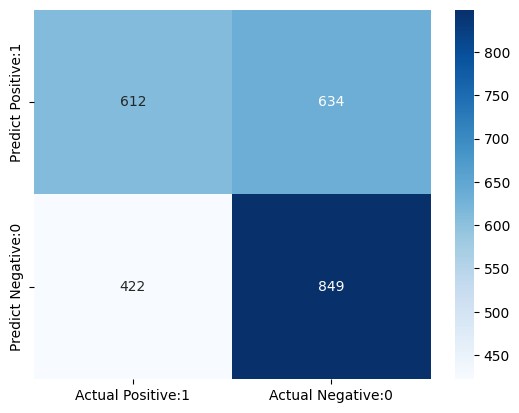

<Figure size 900x900 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gini)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

# Modelo Entropy

In [ ]:
## Imputar Modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test)

## Métricas del modelo

In [ ]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(clf_en.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(clf_en.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.58
Precisión en el set de Test: 0.58


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred_en, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_en, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_en, average='micro')))

F-1 Score :  0.5804529201430274
Precision Score :  0.5804529201430274
Recall Score :  0.5804529201430274


Matriz de Confusión

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.59      0.49      0.54      1246
           1       0.57      0.67      0.62      1271

    accuracy                           0.58      2517
   macro avg       0.58      0.58      0.58      2517
weighted avg       0.58      0.58      0.58      2517



<Figure size 900x900 with 0 Axes>

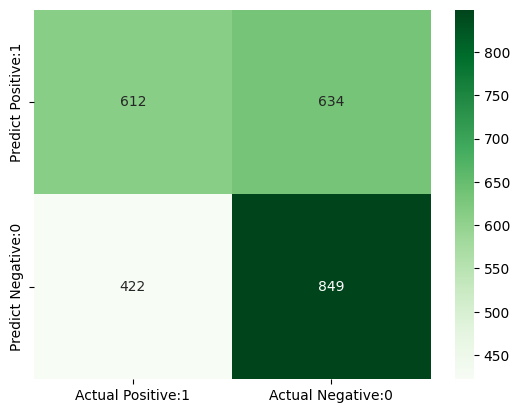

<Figure size 900x900 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Greens')
plt.figure(figsize=(9,9))

# Random Forest

## Imputar el modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.99
Precisión en el set de Test: 0.95


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1246
           1       1.00      0.91      0.95      1271

    accuracy                           0.95      2517
   macro avg       0.96      0.95      0.95      2517
weighted avg       0.96      0.95      0.95      2517



Ejercicio de Random Forest con 100 Arboles

In [ ]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# Se fija el modelo al training set

rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred_100 = rfc_100.predict(X_test)

In [ ]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9519


In [ ]:
# Se crea un clasificador con n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)


# Se ajusta el modelo al training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
#Score más importantes de las características del modelo
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
PrecioUnitario,0.308182
CantidadUMTarifa,0.143828
SecuenciaFraccion,0.141907
ImpuestosPagados,0.093481
PaisOrigenDestino,0.087529
SeccionAduanera,0.046735
NOM,0.046141
Patente,0.042304
Fraccion,0.037787
CantidadUMComercial,0.033515


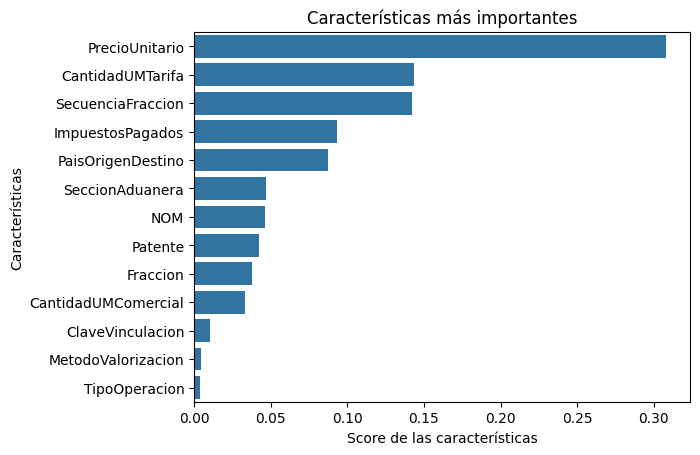

In [ ]:
sns.barplot(x=feature_scores, y=feature_scores.index)

# Agregamos etiquetas al gráfico

plt.xlabel('Score de las características')

plt.ylabel('Características')

# Agregamos título al gráfico

plt.title("Características más importantes")

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))

F-1 Score :  0.9519268970997219
Precision Score :  0.9519268970997219
Recall Score :  0.9519268970997219


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1246
           1       1.00      0.91      0.95      1271

    accuracy                           0.95      2517
   macro avg       0.96      0.95      0.95      2517
weighted avg       0.96      0.95      0.95      2517



<Figure size 900x900 with 0 Axes>

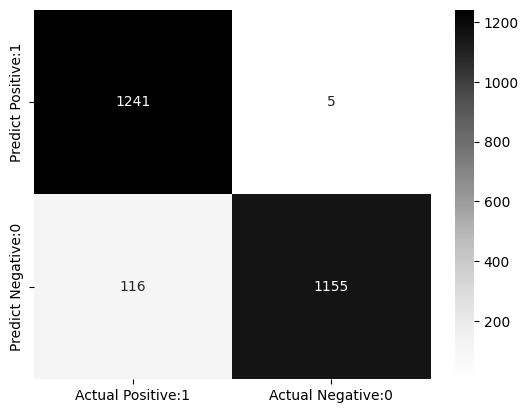

<Figure size 900x900 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Grays')
plt.figure(figsize=(9,9))

# XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#n_estimators=100 specifies how many times to go through the modeling cycle described above.
# You can experiment with your dataset to find the ideal. Typical values range from 100-1000,
# though this depends a lot on the learning rate discussed below.
#learning_rate parameter can be set to control the weighting of new trees added to the model.

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.001)

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(xgb.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(xgb.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.74
Precisión en el set de Test: 0.72


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))

F-1 Score :  0.7183154549066348
Precision Score :  0.7183154549066348
Recall Score :  0.7183154549066348


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1246
           1       0.74      0.69      0.71      1271

    accuracy                           0.72      2517
   macro avg       0.72      0.72      0.72      2517
weighted avg       0.72      0.72      0.72      2517



<Figure size 900x900 with 0 Axes>

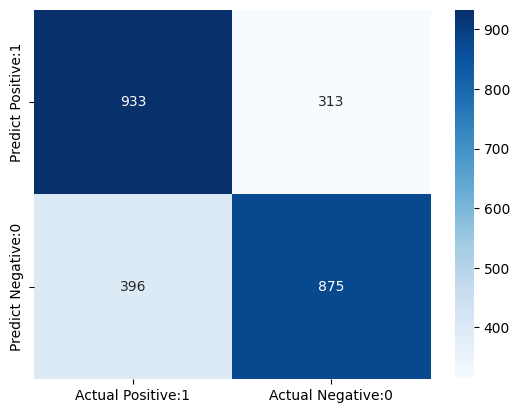

<Figure size 900x900 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

# Comparativa entre modelos

In [ ]:
from sklearn.metrics import accuracy_score,log_loss

In [ ]:
lR = LogisticRegression()
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.001)

## Hacer una lista para todos los objetos creados

In [ ]:
algos = [lR,rfc_100, clf_en, xgb]
ml_algo = ['Logistic Regs','Random Forest',"DT", 'XGBoost']

## Hacer un loop para todos los algoritmos usados en el problema de predicción

In [ ]:
for i,j in zip(algos,ml_algo):
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    print(j,':\n')
    print('Accuracy Score:{:.2f}%'.format(accuracy_score(y_test,pred)*100))
    print('Log Loss:{:.2f}'.format(log_loss(y_test,pred)))
    print('='*40)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regs :

Accuracy Score:56.58%
Log Loss:15.65
Random Forest :

Accuracy Score:95.19%
Log Loss:1.73
DT :

Accuracy Score:58.05%
Log Loss:15.12
XGBoost :

Accuracy Score:71.83%
Log Loss:10.15
